# Densepose 

##Creating the Enviroment

In [ ]:
!pip install git+https://github.com/facebookresearch/detectron2@main#subdirectory=projects/DensePose

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2 (to revision main) to /tmp/pip-req-build-xgyxklc5
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2 /tmp/pip-req-build-xgyxklc5
  Resolved https://github.com/facebookresearch/detectron2 to commit ecb786ccd26de4086a6fede437e7d728199470e2
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-install-a7brvvpp/detectron2_b83fdd5afaa64ab580054999c0c77a0e
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-install-a7brvvpp/detectron2_b83fdd5afaa64ab580054999c0c77a0e
  Resolved https://github.com/facebookresearch/detectron2.git to commit ecb786ccd26de4086a6fede437e7d728199470e2
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.2

In [ ]:
!git clone https://github.com/Whizz-Technologies/detectron2-barinov

Cloning into 'detectron2-barinov'...
remote: Enumerating objects: 14932, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 14932 (delta 11), reused 7 (delta 4), pack-reused 14911
Receiving objects: 100% (14932/14932), 6.05 MiB | 18.42 MiB/s, done.
Resolving deltas: 100% (10852/10852), done.


## Using Chart Based (Inference) 

In here we are doing the inference for the body poses, it will create segmentatio mask for each person in the photo seperately

In [ ]:
cd /content/detectron2-barinov/projects/DensePose

/content/detectron2-barinov/projects/DensePose


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp '/content/drive/MyDrive/Densepose weights/model_final_0ed407.pkl' ./

## Upload the File to run through Densepose and Infering

**(You have to rerun it if you want to upload new file)**

Saving photo_2023-04-04_17-48-24.jpg to photo_2023-04-04_17-48-24 (1).jpg


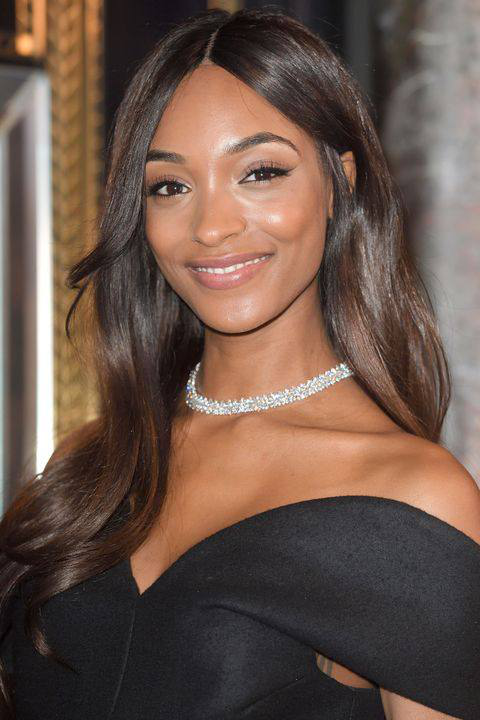

In [ ]:
#@title Upload
from google.colab import files
from PIL import Image
import io
uploaded = files.upload()
image = Image.open(io.BytesIO(list(uploaded.values())[0]))
image.save('/content/detectron2-barinov/projects/DensePose/image.png')
image

### Running the Inference

In [ ]:
cd /content/detectron2-barinov/projects/DensePose

/content/detectron2-barinov/projects/DensePose


In [ ]:
path = '/content/'
import os
for file in os.listdir(path):
  if 'seg' in file and 'segmentation' not in file:
    os.remove(os.path.join(path,file))

In [ ]:
path = '/content/detectron2-barinov/projects/DensePose'
import os
for file in os.listdir(path):
  if 'image_' in file:
    os.remove(os.path.join(path,file))

In [ ]:
!python apply_net.py show configs/densepose_rcnn_R_50_FPN_DL_s1x.yaml model_final_0ed407.pkl "/content/detectron2-barinov/projects/DensePose/image.png" dp_segm --output "/content/out.jpg"

Called
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
index 0
Saving Segmented Result
Unique in segm [ 0  2 15 16 17 18 23 24] shape (702, 471)
Unique in mask [0 1] shape (702, 471)
Matrix unique value before scale [ 0  2 15 16 17 18 23 24]
Matrix unique value after scale [  0.     21.25  159.375 170.    180.625 191.25  244.375 255.   ]


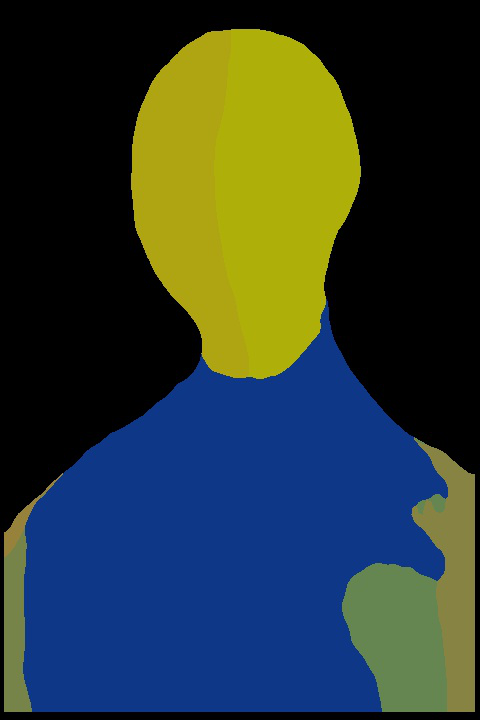

In [ ]:
#@title Showing the overlayed mask
img = Image.open('/content/out.0001.jpg')
img


 ## Segmenting the body except the head

seg_0.npy
0


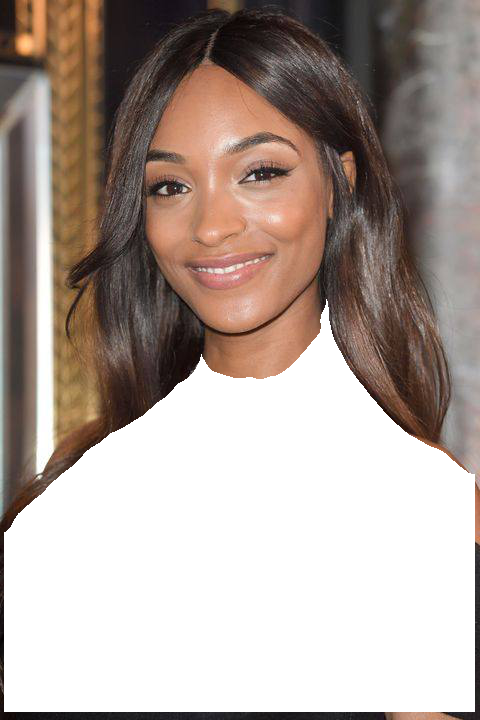

In [ ]:

import os
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

path = '/content/'
for file in os.listdir(path):
  if 'seg' in file and '.npy' in file:

    print(file)
    id = file.split('_')[1].split('.')[0]
    print(int(id))

    img_segm = np.load(os.path.join(path,file))
    img_segm_2 = np.load(os.path.join(path,file))
    orig_img = cv2.imread('/content/detectron2-barinov/projects/DensePose/image.png')

    # Invert the mask
    img_segm[(img_segm > 0) & (img_segm < 23)] = 0
    img_segm[img_segm >= 23] = 255
    inverse_mask = cv2.bitwise_not(img_segm)
    
    img_segm_2[img_segm_2 >= 23] = 0
    img_segm_2[(img_segm_2 > 0) & (img_segm_2 < 23)] = 255
    inverse_mask_2 = cv2.bitwise_not(img_segm_2) 

    # Create a white image
    white_image = np.full_like(orig_img, (255, 255, 255))

    # Apply the inverted mask to the white image
    masked_area = cv2.bitwise_and(orig_img, orig_img, mask=inverse_mask_2)

    # Apply the mask to the original image
    masked_image = cv2.bitwise_and(white_image, white_image, mask=img_segm_2)

    # Combine the masked area and masked image
    result = cv2.add(masked_area, masked_image)

    cv2_imshow(result)
    cv2.imwrite('/content/detectron2-barinov/projects/DensePose/image_{}.png'.format(id),result)
